# [TRI30021 - Prestiti (escluse sofferenze) - per divisa, durata, provincia, settore e attività economica della clientela](https://infostat.bancaditalia.it/inquiry/home?spyglass/taxo:CUBESET=&ITEMSELEZ=&OPEN=false/&ep:LC=IT&COMM=BANKITALIA&ENV=LIVE&CTX=DIFF&IDX=1&/view:CUBEIDS=TRI30021)


| Elemento | Descrizione                                                                                     |
| -------- | ----------------------------------------------------------------------------------------------- |
| 600      | Famiglie consumatrici                                                                           |
| S0       | Totale dei settori nazionali ed esteri (S1+S2)                                                  |
| **S11**      | **Società non finanziarie**                                                                 |
| S11BI7   | Quasi-società non finanziarie artigiane                                                         |
| S11BI8   | Quasi-società non finanziarie altre                                                             |
| S12      | Società finanziarie                                                                             |
| S12BI39  | Imprese finanziarie e assicurative diverse da bcn e banche                                      |
| S12BI7   | Società finanziarie diverse da istituzioni finanziarie monetarie                                |
| S13      | Amministrazioni pubbliche                                                                       |
| S14BI2   | Famiglie produttrici (fino a 5 addetti)                                                         |
| **S14BI4**   | **Famiglie produttrici**                                                                    |
| S2       | Resto del mondo                                                                                 |
| S2BI93   | Settore non bancario estero                                                                     |
| SBI119   | Totale clientela ordinaria residente (escluse banche, bcn e compresa CDP)                       |
| SBI129   | Totale residenti esclusa la BCN                                                                 |
| SBI25    | Società non finanziarie e famiglie produttrici                                                  |
| SBI28    | Famiglie consumatrici, istituz.senza scopo di lucro, dati non classificabili e valore residuale |
| SBI33    | Società di persone, semplici, di fatto e ditte individuali con meno di 20 addetti               |
| SBI42    | Totale residenti al netto delle Istituzioni finanziarie monetarie                               |
| SBI57    | Istituzioni finanziariemonetarie della UE e organismi internazionali                            |
| SBI59    | Clientela residente e non residente al netto delle Istituzioni finanziarie monetarie            |
| SBI76    | Totale clientela ordinaria residente (escluse banche, bcn e CDP)                                |
| SBI91    | Totale clientela ordinaria residente (escluse banche e bcn e compresa CDP) e non residente      |




| Codice   | Descrizione                                        |
| -------- | -------------------------------------------------- |
| 35105532 | Prestiti (escluse sofferenze): accordato operativo |
| **35105533** | **Prestiti (escluse sofferenze): utilizzato**          |
| 35105536 | Prestiti (escluse sofferenze): importo garantito   |
| 35105539 | Prestiti (escluse sofferenze): sconfinamento       |
| 35105540 | Prestiti (escluse sofferenze): margini disponibili |


|Codice|ENTE_SEGN|
|-|-|
|1100010|Banche|
|3691006|Finanziarie e veicoli|
|3691029|Banche, finanziarie e veicoli|

In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connessione al database e lettura dati
db_path = "D:/Bankit.sqlite"

## ETL

In [23]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()


# === 2. Recupera tutte le colonne della tabella ===
cursor.execute("PRAGMA table_info(TRI30021)")
tutte_le_colonne = [row[1] for row in cursor.fetchall()]

# === 3. Escludi le colonne che non ci interessano ===
colonne_da_esplorare = [col for col in tutte_le_colonne if col not in ("DATA_OSS", "VALORE", "STATUS")]

# === 4. Estrai i valori distinti per ogni colonna ===
risultati = {}

for col in colonne_da_esplorare:
    try:
        cursor.execute(f'SELECT DISTINCT "{col}" FROM TRI30021 ORDER BY 1')
        risultati[col] = [row[0] for row in cursor.fetchall()]
    except Exception as e:
        print(f"Errore nella colonna {col}: {e}")

conn.close()

# === 5. Costruisci DataFrame largo (max 100 righe) ===
df_unici = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in risultati.items()]))

# === 6. Mostra TUTTO il DataFrame completo a video ===
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)          # mostra tutte le righe
pd.set_option("display.max_colwidth", None)      # mostra tutte le colonne senza troncamento
pd.set_option("display.width", None)             # disabilita il wrapping automatico

print("\nValori unici per ciascuna colonna (escluse DATA_OSS e VALORE):\n")
print(df_unici)

# === 7. (Facoltativo) Esporta su file Excel o CSV ===
# df_unici.to_excel("valori_unici_tri30021.xlsx", index=False)
# df_unici.to_csv("valori_unici_tri30021.csv", index=False)



Valori unici per ciascuna colonna (escluse DATA_OSS e VALORE):

    ATECO_CTP  DIVISA1  DURORI ENTE_SEGN     FENEC SEDELEG_SOGG SET_CTP
0           0      2.0     9.0   1100010  35105532           IT     S11
1     1004999   1000.0    11.0   3691006  35105533          ITC  S12BI7
2     1005001      NaN     NaN   3691029  35105536         ITC1     S13
3     1005003      NaN     NaN       NaN  35105539        ITC11  S14BI4
4     1005009      NaN     NaN       NaN  35105540        ITC12   SBI28
5           F      NaN     NaN       NaN       NaN        ITC13   SBI42
6         NaN      NaN     NaN       NaN       NaN        ITC14     NaN
7         NaN      NaN     NaN       NaN       NaN        ITC15     NaN
8         NaN      NaN     NaN       NaN       NaN        ITC16     NaN
9         NaN      NaN     NaN       NaN       NaN        ITC17     NaN
10        NaN      NaN     NaN       NaN       NaN        ITC18     NaN
11        NaN      NaN     NaN       NaN       NaN         ITC2     NaN

In [22]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Ottieni tutte le colonne
cursor.execute("PRAGMA table_info(TRI30021)")
tutte_le_colonne = [row[1] for row in cursor.fetchall()]
colonne_utili = [col for col in tutte_le_colonne if col not in ("DATA_OSS", "VALORE", "STATUS")]

# Lista per costruire il dataframe "lungo"
records = []

for col in colonne_utili:
    try:
        cursor.execute(f'SELECT DISTINCT "{col}" FROM TRI30021 ORDER BY 1')
        valori = cursor.fetchall()
        for val in valori:
            records.append((col, val[0]))
    except Exception as e:
        print(f"Errore nella colonna {col}: {e}")

conn.close()

# Crea DataFrame "lungo"
df_lungo = pd.DataFrame(records, columns=["colonna", "valore"])

# Mostra tutto senza troncamento
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

print("\n🎯 Valori unici in formato lungo (escluse DATA_OSS e VALORE):\n")
print(df_lungo)



🎯 Valori unici in formato lungo (escluse DATA_OSS e VALORE):

          colonna    valore
0       ATECO_CTP         0
1       ATECO_CTP   1004999
2       ATECO_CTP   1005001
3       ATECO_CTP   1005003
4       ATECO_CTP   1005009
5       ATECO_CTP         F
6         DIVISA1         2
7         DIVISA1      1000
8          DURORI         9
9          DURORI        11
10      ENTE_SEGN   1100010
11      ENTE_SEGN   3691006
12      ENTE_SEGN   3691029
13          FENEC  35105532
14          FENEC  35105533
15          FENEC  35105536
16          FENEC  35105539
17          FENEC  35105540
18   SEDELEG_SOGG        IT
19   SEDELEG_SOGG       ITC
20   SEDELEG_SOGG      ITC1
21   SEDELEG_SOGG     ITC11
22   SEDELEG_SOGG     ITC12
23   SEDELEG_SOGG     ITC13
24   SEDELEG_SOGG     ITC14
25   SEDELEG_SOGG     ITC15
26   SEDELEG_SOGG     ITC16
27   SEDELEG_SOGG     ITC17
28   SEDELEG_SOGG     ITC18
29   SEDELEG_SOGG      ITC2
30   SEDELEG_SOGG     ITC20
31   SEDELEG_SOGG      ITC3
32   SEDELEG_

## analisi

In [3]:
# Calcolo del lungo termine per SEDELEG_SOGG e SET_CTP
df_durori = df[df["DURORI"].isin([9, 11])]

pivot_durata = df_durori.pivot_table(
    index=["DATA_OSS", "SEDELEG_SOGG", "SET_CTP"],
    columns="DURORI",
    values="VALORE",
    aggfunc="sum",
    fill_value=0
).rename(columns={9: "Totale", 11: "Breve"})

pivot_durata["Lungo termine"] = pivot_durata["Totale"] - pivot_durata["Breve"]

# Ricrea il DataFrame in formato largo: SEDELEG_SOGG × SET_CTP
df_lungo5 = pivot_durata["Lungo termine"].reset_index()
df_pivot5 = df_lungo5.pivot(index="DATA_OSS", columns=["SEDELEG_SOGG", "SET_CTP"], values="Lungo termine")

# Normalizza base 100
df_norm5 = df_pivot5.divide(df_pivot5.iloc[0]) * 100


In [4]:
# === 1. Caricamento dati ===
conn = sqlite3.connect(db_path)
segnalante = '3691006' 
query = f"""
SELECT DATA_OSS, SEDELEG_SOGG, SET_CTP, DURORI, VALORE
FROM TRI30021
WHERE DIVISA1 = '1000' AND ATECO_CTP = '1004999'
  AND SET_CTP IN ('S14BI4', 'S11')
  AND FENEC = '35105533'
  AND ENTE_SEGN = '{segnalante}'
  AND SEDELEG_SOGG IN ('ITC','ITF','ITG','ITH','ITI')
"""
df = pd.read_sql_query(query, conn)
conn.close()

# === 2. Preprocessing ===
df["DATA_OSS"] = pd.to_datetime(df["DATA_OSS"])
area_map = {
    "ITF": "Mezzogiorno",
    "ITG": "Mezzogiorno",
    "ITC": "CentroNord",
    "ITH": "CentroNord",
    "ITI": "CentroNord"
}
df["area"] = df["SEDELEG_SOGG"].map(area_map)

# === 3. Pivot Totale e Breve → Lungo termine ===
df_durori = df[df["DURORI"].isin([9, 11])]
pivot_durata = df_durori.pivot_table(
    index=["DATA_OSS", "area", "SET_CTP"],
    columns="DURORI",
    values="VALORE",
    aggfunc="sum",
    fill_value=0
).rename(columns={9: "Totale", 11: "Breve"})

pivot_sorted.head(10)



NameError: name 'pivot_sorted' is not defined

### grafici 2

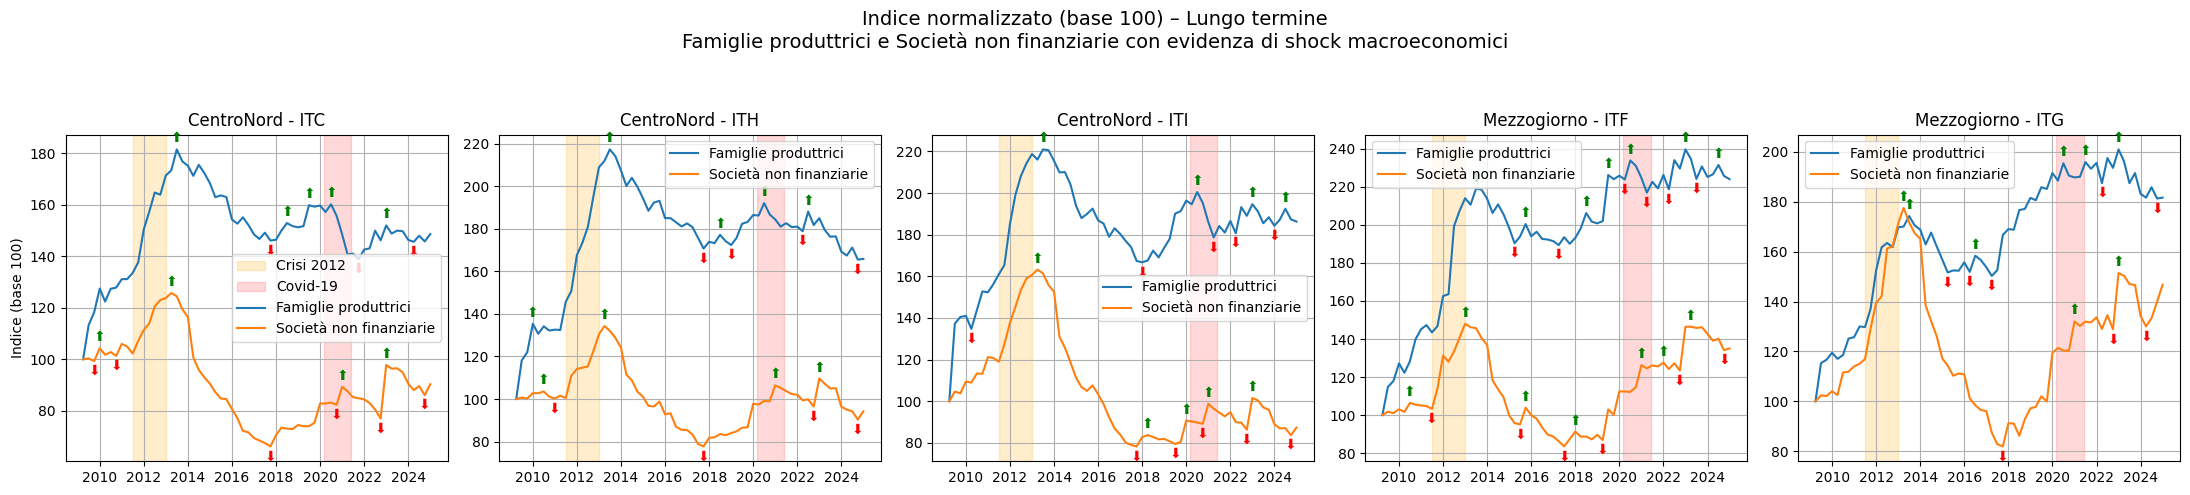

In [5]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharey=False)
sedi = ["ITC", "ITH", "ITI", "ITF", "ITG"]

etichette_set = {
    "S14BI4": "Famiglie produttrici",
    "S11": "Società non finanziarie"
}

etichette_sede = {
    "ITC": "CentroNord - ITC",
    "ITH": "CentroNord - ITH",
    "ITI": "CentroNord - ITI",
    "ITF": "Mezzogiorno - ITF",
    "ITG": "Mezzogiorno - ITG"
}

for i, sede in enumerate(sedi):
    ax = axes[i]

    ax.axvspan(pd.Timestamp("2011-07-01"), pd.Timestamp("2013-01-01"),
               color="orange", alpha=0.2, label="Crisi 2012" if i == 0 else None)

    ax.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2021-06-01"),
               color="red", alpha=0.15, label="Covid-19" if i == 0 else None)

    for tipo in ["S14BI4", "S11"]:
        col = (sede, tipo)
        if col in df_norm5.columns:
            serie = df_norm5[col].dropna()
            x = serie.index
            y = serie.values
            ax.plot(x, y, label=etichette_set.get(tipo, tipo))

            max_idx = argrelextrema(y, np.greater, order=3)[0]
            min_idx = argrelextrema(y, np.less, order=3)[0]
            for idx in max_idx:
                ax.annotate('⬆', (x[idx], y[idx]), textcoords="offset points", xytext=(0, 5), ha='center', color='green')
            for idx in min_idx:
                ax.annotate('⬇', (x[idx], y[idx]), textcoords="offset points", xytext=(0, -10), ha='center', color='red')

    ax.set_title(etichette_sede[sede])
    ax.set_xlabel("")
    if i == 0:
        ax.set_ylabel("Indice (base 100)")
    ax.grid(True)
    ax.legend()

plt.suptitle("Indice normalizzato (base 100) – Lungo termine\nFamiglie produttrici e Società non finanziarie con evidenza di shock macroeconomici", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()



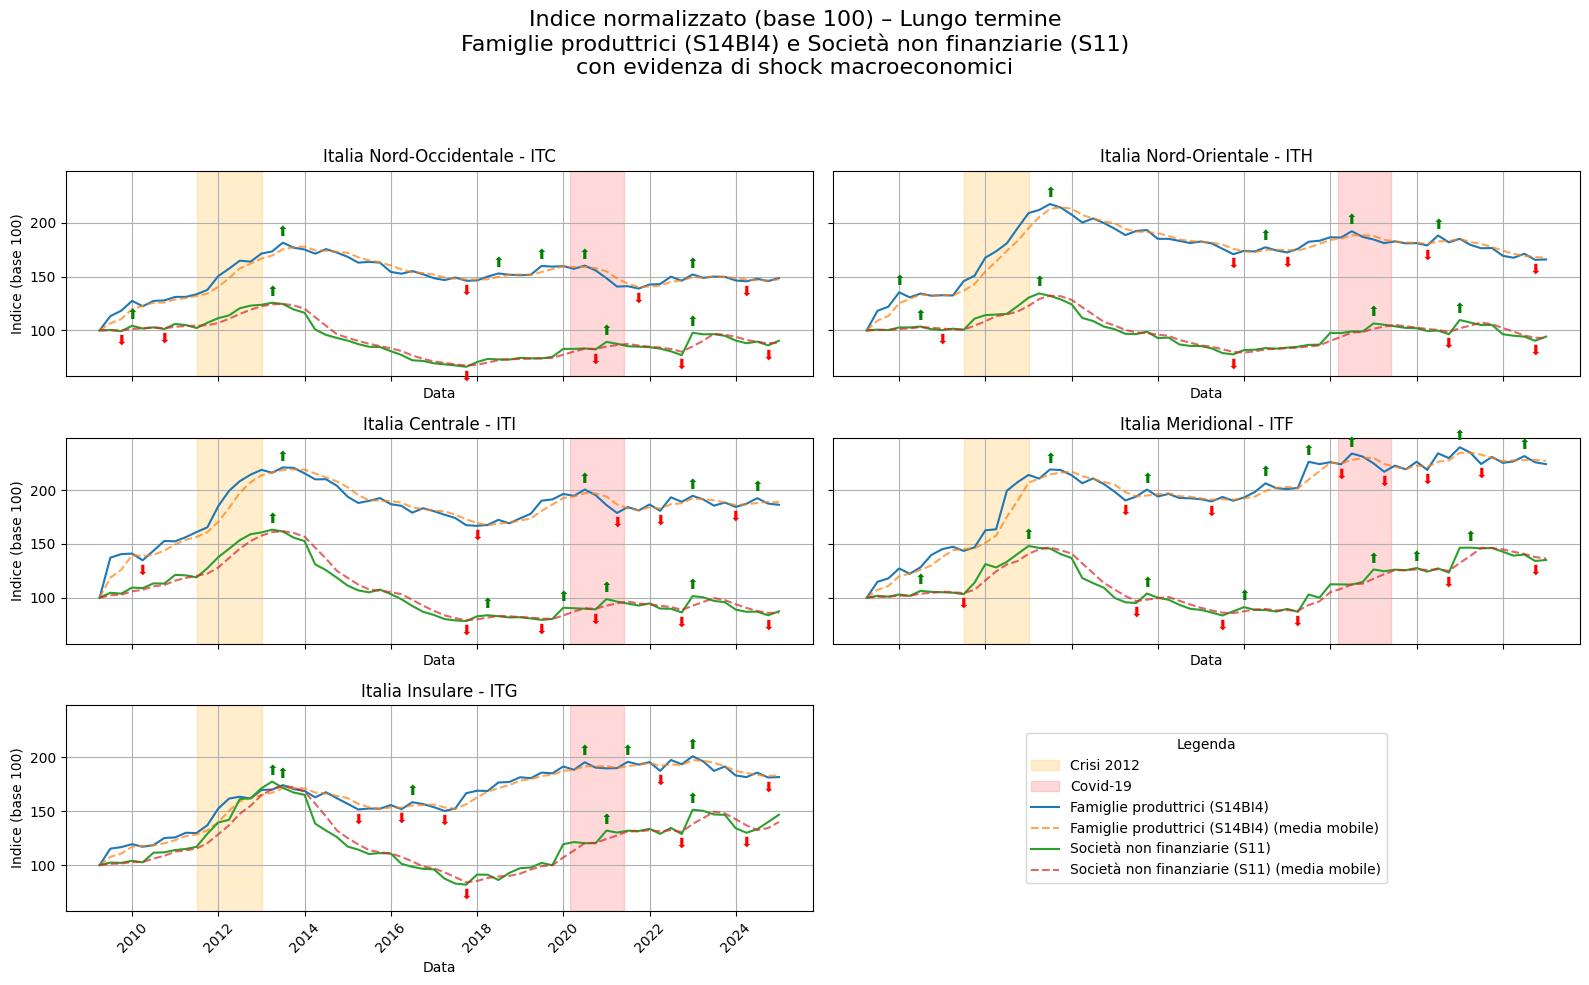

In [6]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np

fig, axes = plt.subplots(3, 2, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()

sedi = ["ITC", "ITH", "ITI", "ITF", "ITG"]

# Etichette leggibili con codice incluso
etichette_set = {
    "S14BI4": "Famiglie produttrici (S14BI4)",
    "S11": "Società non finanziarie (S11)"
}

etichette_sede = {
    "ITC": "Italia Nord-Occidentale - ITC",
    "ITH": "Italia Nord-Orientale - ITH",
    "ITI": "Italia Centrale - ITI",
    "ITF": "Italia Meridional - ITF",
    "ITG": "Italia Insulare - ITG"
}

for i, sede in enumerate(sedi):
    ax = axes[i]

    # Evidenzia shock
    ax.axvspan(pd.Timestamp("2011-07-01"), pd.Timestamp("2013-01-01"),
               color="orange", alpha=0.2, label="Crisi 2012" if i == 0 else None)
    ax.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2021-06-01"),
               color="red", alpha=0.15, label="Covid-19" if i == 0 else None)

    for tipo in ["S14BI4", "S11"]:
        col = (sede, tipo)
        if col in df_norm5.columns:
            serie = df_norm5[col].dropna()
            x = serie.index
            y = serie.values
            label = etichette_set.get(tipo, tipo)

            # Linea originale
            ax.plot(x, y, label=label)

            # Media mobile
            y_ma = serie.rolling(window=3, min_periods=1).mean()
            ax.plot(x, y_ma, linestyle="--", linewidth=1.5, alpha=0.7, label=f"{label} (media mobile)")

            # Annotazioni: massimi/minimi
            max_idx = argrelextrema(y, np.greater, order=3)[0]
            min_idx = argrelextrema(y, np.less, order=3)[0]
            for idx in max_idx:
                ax.annotate('⬆', (x[idx], y[idx]), textcoords="offset points", xytext=(0, 5), ha='center', color='green')
            for idx in min_idx:
                ax.annotate('⬇', (x[idx], y[idx]), textcoords="offset points", xytext=(0, -10), ha='center', color='red')

    ax.set_title(etichette_sede[sede])
    ax.set_xlabel("Data")
    ax.tick_params(axis='x', rotation=45)
    if i % 2 == 0:
        ax.set_ylabel("Indice (base 100)")
    ax.grid(True)

# === Usa il sesto subplot (ultimo riquadro) per la legenda ===
ax_legenda = axes[-1]
ax_legenda.axis('off')  # Nasconde assi
handles, labels = axes[0].get_legend_handles_labels()
ax_legenda.legend(handles, labels, loc='center', frameon=True, fontsize=10, title="Legenda")

# Titolo e layout finale
plt.suptitle("Indice normalizzato (base 100) – Lungo termine\nFamiglie produttrici (S14BI4) e Società non finanziarie (S11)\ncon evidenza di shock macroeconomici", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


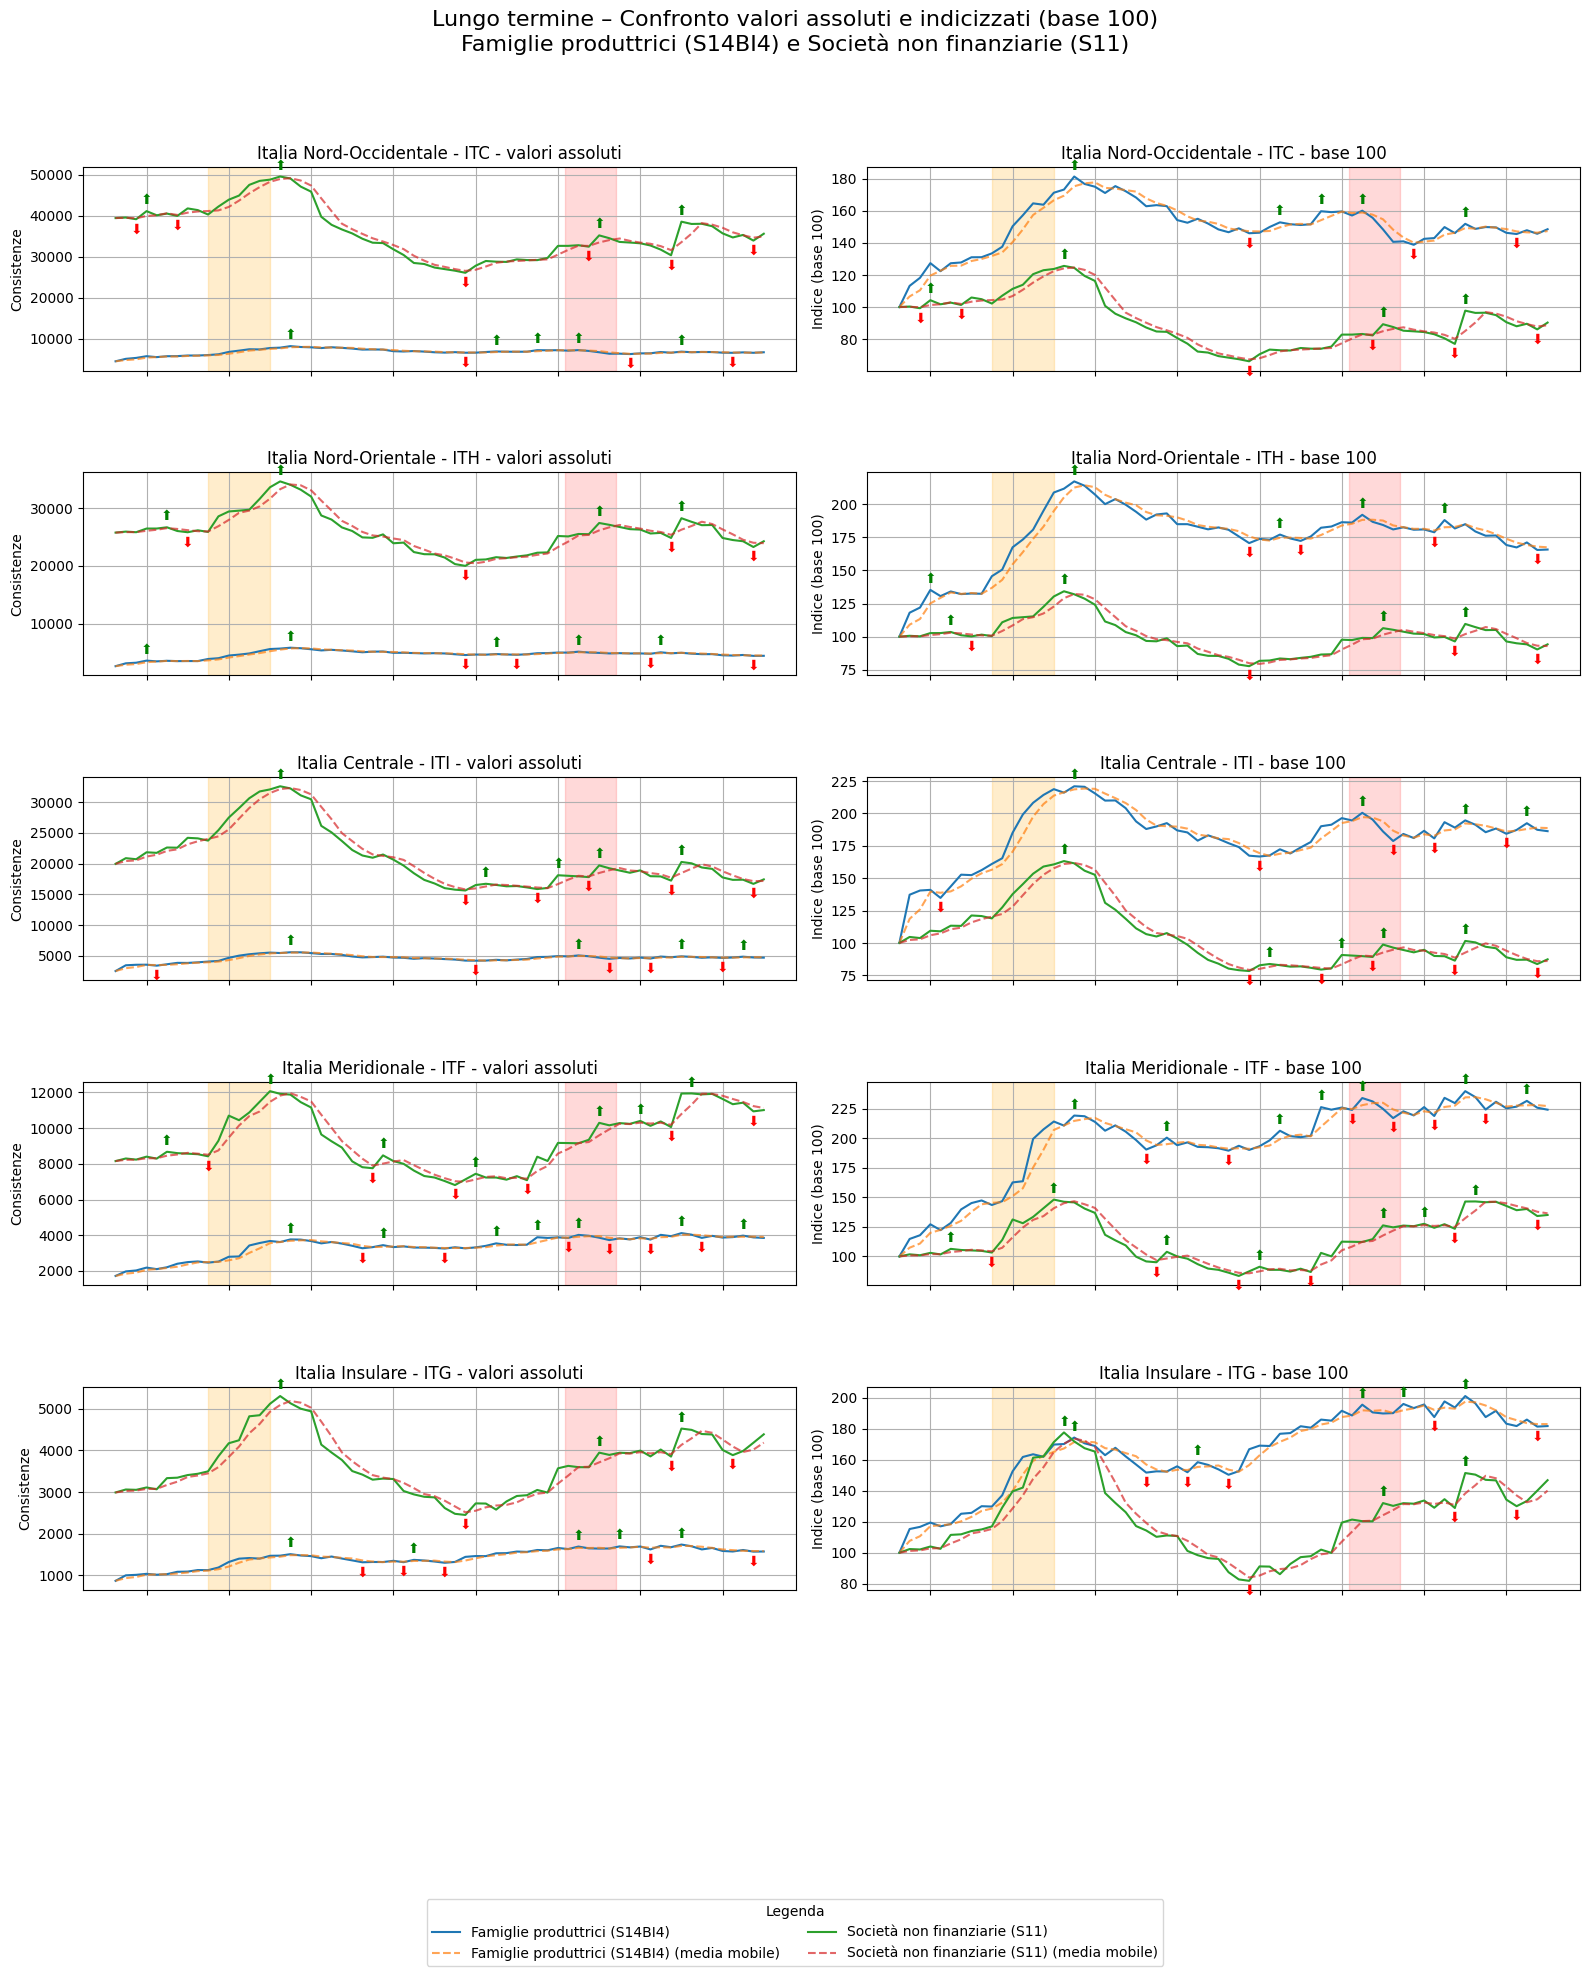

In [10]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np

fig, axes = plt.subplots(6, 2, figsize=(16, 20), sharex=True)
sedi = ["ITC", "ITH", "ITI", "ITF", "ITG"]

etichette_set = {
    "S14BI4": "Famiglie produttrici (S14BI4)",
    "S11": "Società non finanziarie (S11)"
}

etichette_sede = {
    "ITC": "Italia Nord-Occidentale - ITC",
    "ITH": "Italia Nord-Orientale - ITH",
    "ITI": "Italia Centrale - ITI",
    "ITF": "Italia Meridionale - ITF",
    "ITG": "Italia Insulare - ITG"
}

def plot_confronto(ax, sede, df, normalizzato):
    for tipo in ["S14BI4", "S11"]:
        col = (sede, tipo)
        if col in df.columns:
            serie = df[col].dropna()
            x = serie.index
            y = serie.values
            label = etichette_set.get(tipo, tipo)

            # Linea originale
            ax.plot(x, y, label=label)

            # Media mobile
            y_ma = serie.rolling(window=3, min_periods=1).mean()
            ax.plot(x, y_ma, linestyle="--", linewidth=1.5, alpha=0.7, label=f"{label} (media mobile)")

            # Annotazioni
            max_idx = argrelextrema(y, np.greater, order=3)[0]
            min_idx = argrelextrema(y, np.less, order=3)[0]
            for idx in max_idx:
                ax.annotate('⬆', (x[idx], y[idx]), textcoords="offset points", xytext=(0, 5), ha='center', color='green')
            for idx in min_idx:
                ax.annotate('⬇', (x[idx], y[idx]), textcoords="offset points", xytext=(0, -10), ha='center', color='red')

    ax.axvspan(pd.Timestamp("2011-07-01"), pd.Timestamp("2013-01-01"), color="orange", alpha=0.2)
    ax.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2021-06-01"), color="red", alpha=0.15)

    ax.set_title(f"{etichette_sede[sede]} - {'base 100' if normalizzato else 'valori assoluti'}")
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    if not normalizzato:
        ax.set_ylabel("Consistenze")
    else:
        ax.set_ylabel("Indice (base 100)")

# Disegna i grafici
for i, sede in enumerate(sedi):
    plot_confronto(axes[i, 0], sede, df_pivot5, normalizzato=False)  # Colonna sinistra: valori assoluti
    plot_confronto(axes[i, 1], sede, df_norm5, normalizzato=True)    # Colonna destra: base 100

# Rimuove assi e unisce la sesta riga per la legenda
axes[-1, 0].axis('off')
axes[-1, 1].axis('off')
handles, labels = axes[0, 0].get_legend_handles_labels()

fig.legend(handles, labels, loc='lower center', ncol=2, frameon=True, fontsize=10, title="Legenda")

# Titolo finale
plt.suptitle("Lungo termine – Confronto valori assoluti e indicizzati (base 100)\nFamiglie produttrici (S14BI4) e Società non finanziarie (S11)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # spazio lasciato per legenda
plt.subplots_adjust(hspace=0.5)
plt.show()


## Nuovi finanziamenti stimati per la Puglia

Nuovi finanziamenti stimati – Puglia:
SET_CTP            S11      S14BI4
DATA_OSS                          
2009-03-31         NaN         NaN
2009-06-30  280.916667  282.633333
2009-09-30   76.333333   86.866667
2009-12-31  302.300000  192.766667
2010-03-31   30.050000  -48.583333
2010-06-30  522.216667  139.000000
2010-09-30   67.616667  233.733333
2010-12-31  113.333333  132.016667
2011-03-31  112.833333   79.550000
2011-06-30   25.333333  -23.816667


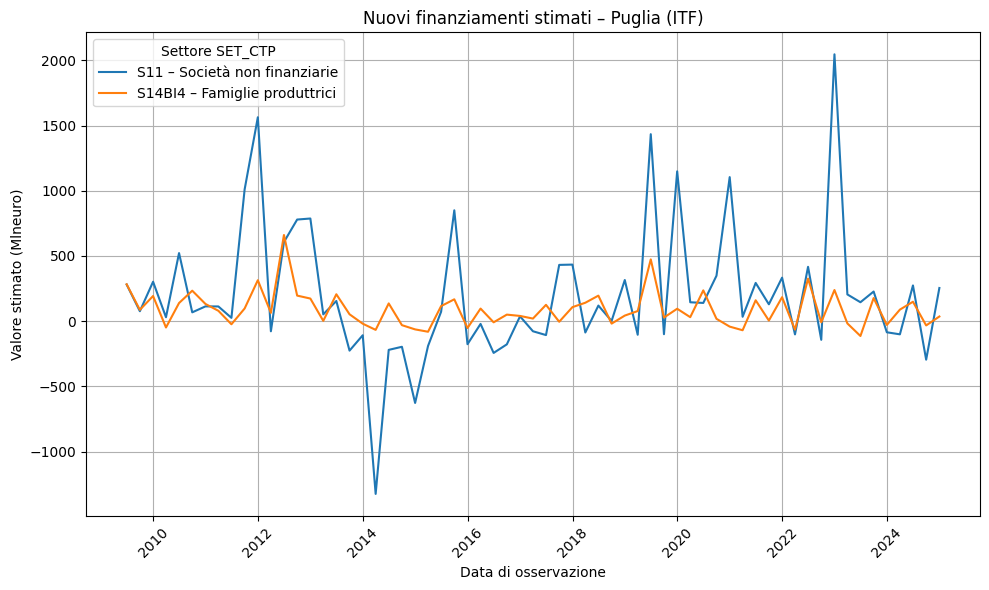

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# === PARAMETRI ===
db_path = "D:/Bankit.sqlite"
segnalante = '3691006'  # Banche, ad esempio
durata_media_mesi = 60  # 5 anni di ammortamento medio

# === 1. QUERY DATI PUGLIA (SEDELEG_SOGG = 'ITF') ===
query = f"""
SELECT DATA_OSS, SEDELEG_SOGG, SET_CTP, DURORI, VALORE
FROM TRI30021
WHERE DIVISA1 = '1000'
  AND ATECO_CTP = '1004999'
  AND SET_CTP IN ('S14BI4', 'S11')
  AND FENEC = '35105533'
  AND ENTE_SEGN = '{segnalante}'
  AND SEDELEG_SOGG = 'ITF'
"""

conn = sqlite3.connect(db_path)
df = pd.read_sql_query(query, conn)
conn.close()

# === 2. PREPROCESSING ===
df["DATA_OSS"] = pd.to_datetime(df["DATA_OSS"])
df = df[df["DURORI"].isin([9, 11])]  # Tieni solo Totale (9) e Breve (11)

# === 3. CALCOLO LUNGO TERMINE: Totale - Breve ===
pivot = df.pivot_table(
    index=["DATA_OSS", "SET_CTP"],
    columns="DURORI",
    values="VALORE",
    aggfunc="sum",
    fill_value=0
).rename(columns={9: "Totale", 11: "Breve"})

pivot["Lungo termine"] = pivot["Totale"] - pivot["Breve"]

# === 4. FORMATTA PER ANALISI TEMPORALE ===
df_lungo = pivot["Lungo termine"].reset_index()
df_pivot = df_lungo.pivot(index="DATA_OSS", columns="SET_CTP", values="Lungo termine")

# === 5. CALCOLO NUOVI FINANZIAMENTI ===
delta = df_pivot.diff()
rientri_stimati = df_pivot.shift(1) / durata_media_mesi
nuovi_fin = delta + rientri_stimati

# === 6. VISUALIZZA O ESPORTA ===
# Mostra le prime righe
print("Nuovi finanziamenti stimati – Puglia:")
print(nuovi_fin.head(10))

# Facoltativo: esporta in CSV
# nuovi_fin.to_csv("nuovi_finanziamenti_puglia.csv")


# Etichette leggibili
etichette_set = {
    "S14BI4": "S14BI4 – Famiglie produttrici",
    "S11": "S11 – Società non finanziarie"
}

# GRAFICO
plt.figure(figsize=(10, 6))
for col in nuovi_fin.columns:
    label = etichette_set.get(col, col)
    plt.plot(nuovi_fin.index, nuovi_fin[col], label=label)

plt.title("Nuovi finanziamenti stimati – Puglia (ITF)")
plt.ylabel("Valore stimato (Mlneuro)")
plt.xlabel("Data di osservazione")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Settore SET_CTP")
plt.tight_layout()
plt.show()


## Backup

### grafici 1

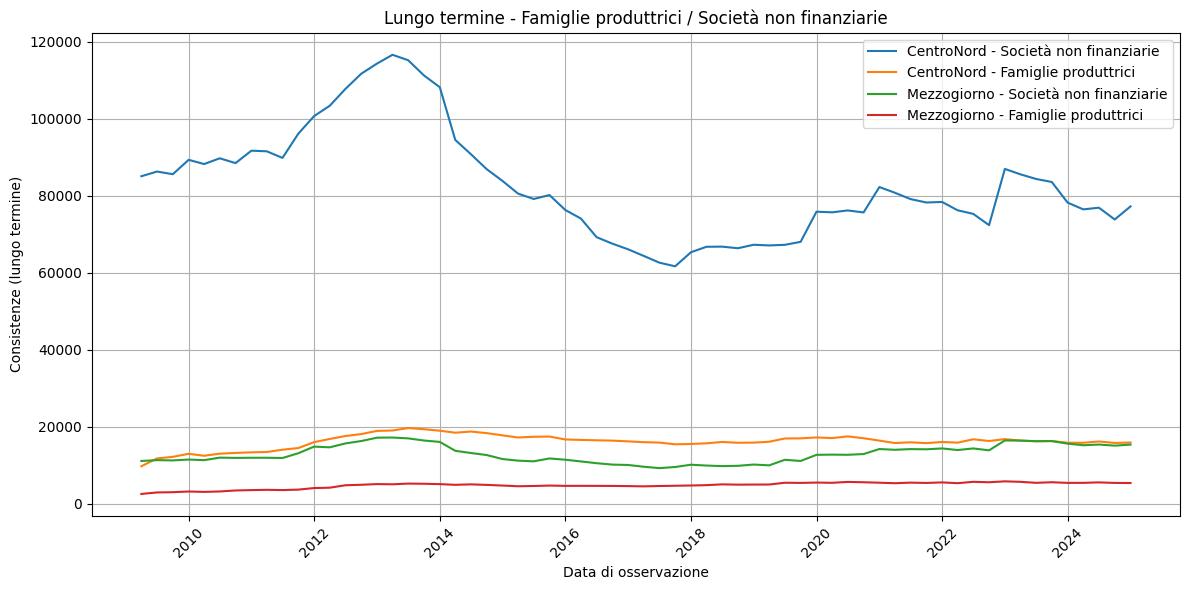

In [23]:
pivot_durata["Lungo termine"] = pivot_durata["Totale"] - pivot_durata["Breve"]

# === 4. Riformattazione per grafico ===
df_lungo = pivot_durata["Lungo termine"].reset_index()
df_pivot = df_lungo.pivot(index="DATA_OSS", columns=["area", "SET_CTP"], values="Lungo termine")

# === 5. Grafico ===
etichette = {
    ("Mezzogiorno", "S14BI4"): "Mezzogiorno - Famiglie produttrici",
    ("CentroNord", "S14BI4"): "CentroNord - Famiglie produttrici",
    ("Mezzogiorno", "S11"): "Mezzogiorno - Società non finanziarie",
    ("CentroNord", "S11"): "CentroNord - Società non finanziarie"
}

plt.figure(figsize=(12, 6))
for col in df_pivot.columns:
    label = etichette.get(col, f"{col[0]} - {col[1]}")
    plt.plot(df_pivot.index, df_pivot[col], label=label)

plt.title("Lungo termine - Famiglie produttrici / Società non finanziarie")
plt.ylabel("Consistenze (lungo termine)")
plt.xlabel("Data di osservazione")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

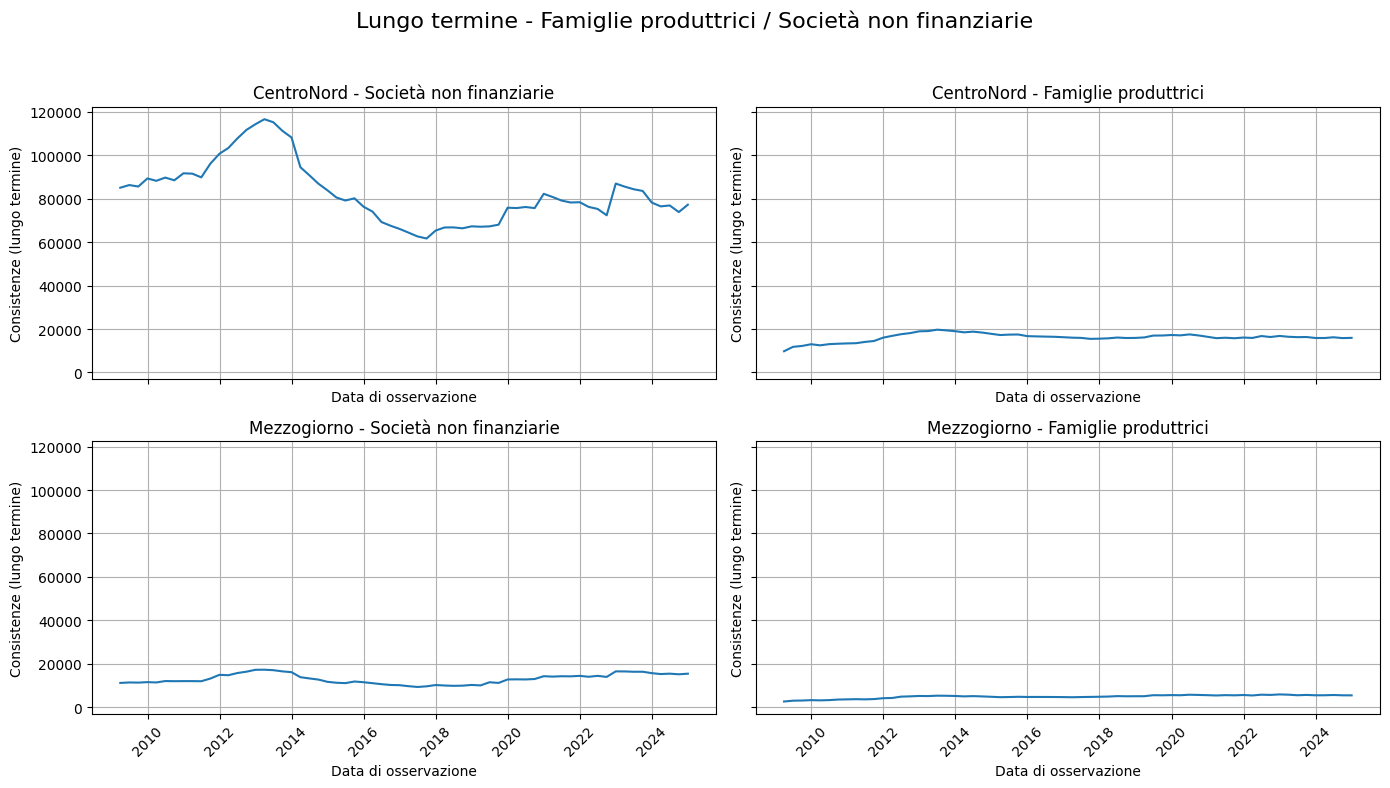

In [24]:
# === Facet: 2x2 subplot per lungo termine ===
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, col in enumerate(df_pivot.columns):
    ax = axes[i]
    label = etichette.get(col, f"{col[0]} - {col[1]}")
    ax.plot(df_pivot.index, df_pivot[col])
    ax.set_title(label)
    ax.grid(True)
    ax.set_xlabel("Data di osservazione")
    ax.set_ylabel("Consistenze (lungo termine)")
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Lungo termine - Famiglie produttrici / Società non finanziarie", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



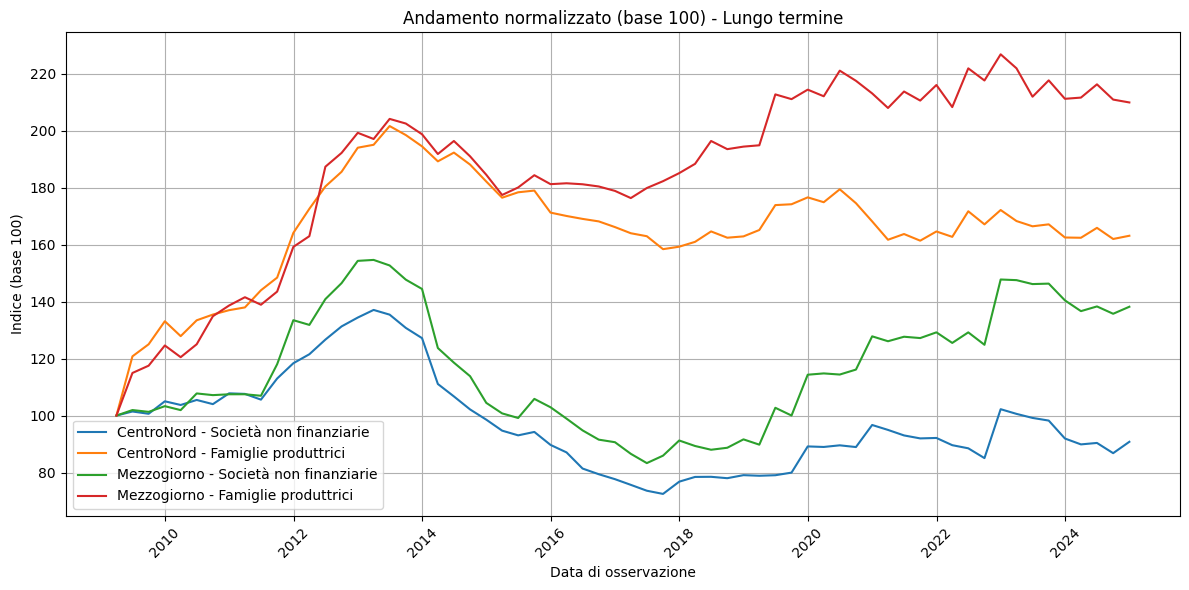

In [25]:
# === Normalizzazione (base 100) sul primo valore disponibile ===
df_norm = df_pivot.divide(df_pivot.iloc[0]) * 100

# === Etichette leggibili ===
etichette = {
    ("Mezzogiorno", "S14BI4"): "Mezzogiorno - Famiglie produttrici",
    ("CentroNord", "S14BI4"): "CentroNord - Famiglie produttrici",
    ("Mezzogiorno", "S11"): "Mezzogiorno - Società non finanziarie",
    ("CentroNord", "S11"): "CentroNord - Società non finanziarie"
}

# === Grafico ===
plt.figure(figsize=(12, 6))
for col in df_norm.columns:
    label = etichette.get(col, f"{col[0]} - {col[1]}")
    plt.plot(df_norm.index, df_norm[col], label=label)

plt.title("Andamento normalizzato (base 100) - Lungo termine")
plt.ylabel("Indice (base 100)")
plt.xlabel("Data di osservazione")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


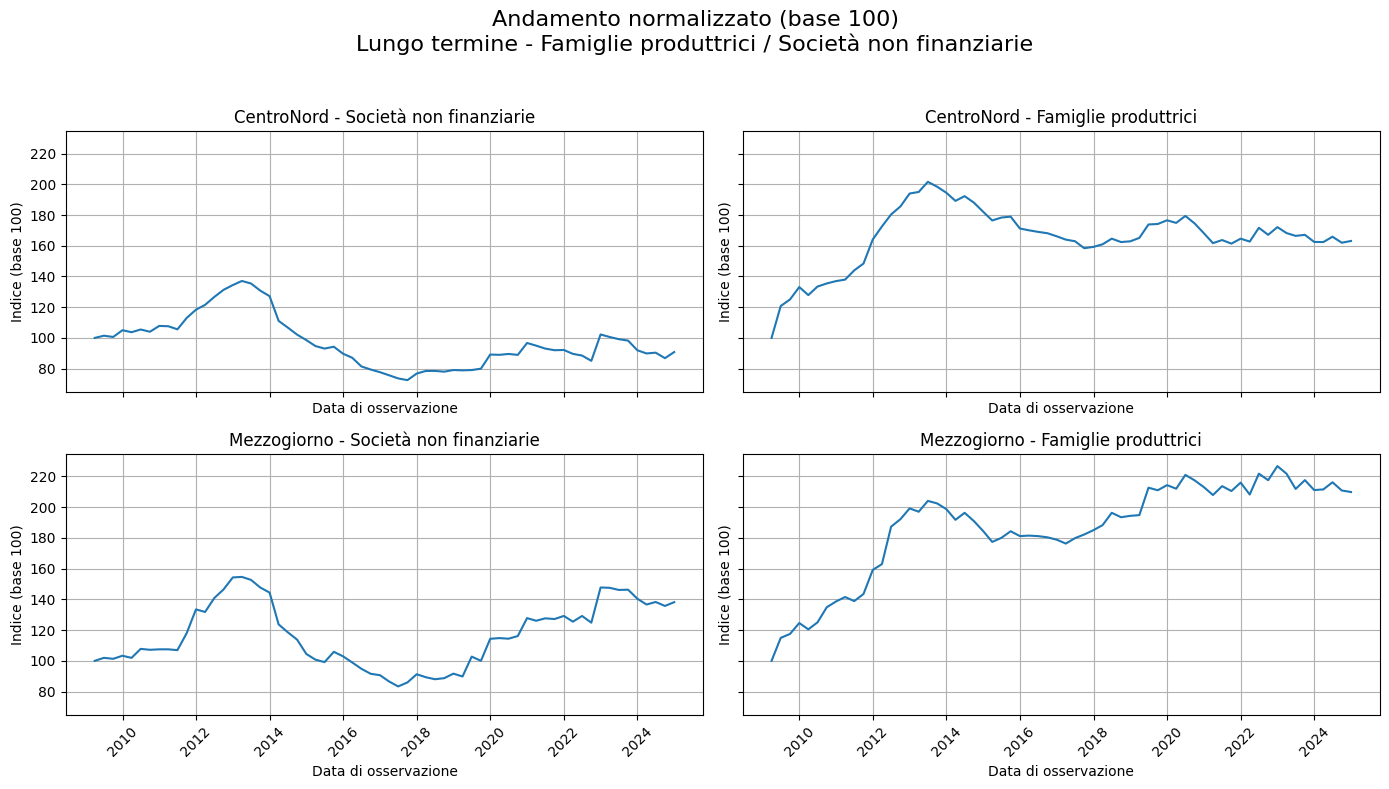

In [26]:
# === Setup dei facet ===
n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, col in enumerate(df_norm.columns):
    ax = axes[i]
    label = etichette.get(col, f"{col[0]} - {col[1]}")
    ax.plot(df_norm.index, df_norm[col])
    ax.set_title(label)
    ax.grid(True)
    ax.set_xlabel("Data di osservazione")
    ax.set_ylabel("Indice (base 100)")
    ax.tick_params(axis='x', rotation=45)

# Titolo generale
plt.suptitle("Andamento normalizzato (base 100)\nLungo termine - Famiglie produttrici / Società non finanziarie", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


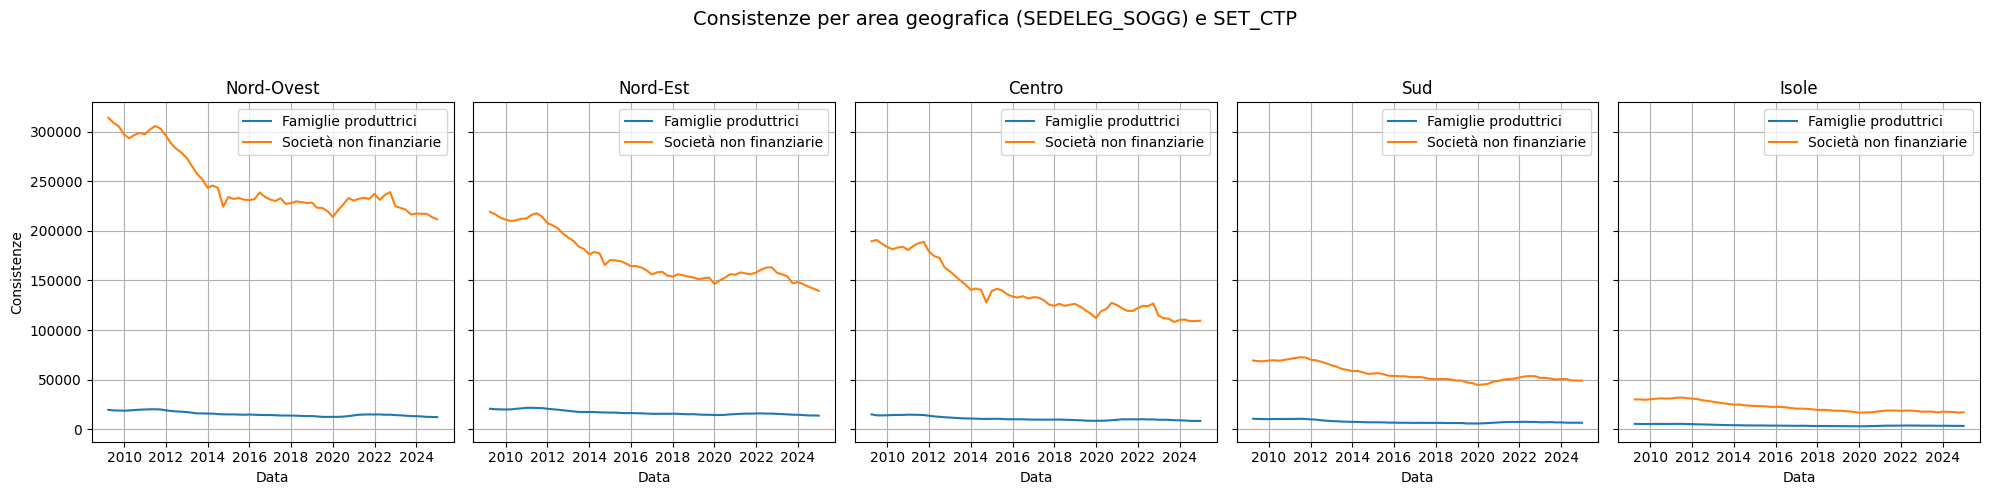

In [11]:
import matplotlib.pyplot as plt

# Rinomina con etichette leggibili
etichette_sede = {
    "ITC": "Nord-Ovest",
    "ITH": "Nord-Est",
    "ITI": "Centro",
    "ITF": "Sud",
    "ITG": "Isole"
}
etichette_set = {
    "S14BI4": "Famiglie produttrici",
    "S11": "Società non finanziarie"
}

# Aggregazione per sede e SET_CTP
df_agg5 = df.groupby(["DATA_OSS", "SEDELEG_SOGG", "SET_CTP"], as_index=False)["VALORE"].sum()

# Pivot per preparare il grafico
df_pivot5 = df_agg5.pivot(index="DATA_OSS", columns=["SEDELEG_SOGG", "SET_CTP"], values="VALORE")

# Facet 5 colonne (uno per ogni SEDELEG_SOGG)
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, sede in enumerate(["ITC", "ITH", "ITI", "ITF", "ITG"]):
    ax = axes[i]
    for tipo in ["S14BI4", "S11"]:
        col = (sede, tipo)
        if col in df_pivot5.columns:
            label = etichette_set.get(tipo, tipo)
            ax.plot(df_pivot5.index, df_pivot5[col], label=label)
    ax.set_title(etichette_sede[sede])
    ax.set_xlabel("Data")
    if i == 0:
        ax.set_ylabel("Consistenze")
    ax.grid(True)
    ax.legend()

plt.suptitle("Consistenze per area geografica (SEDELEG_SOGG) e SET_CTP", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


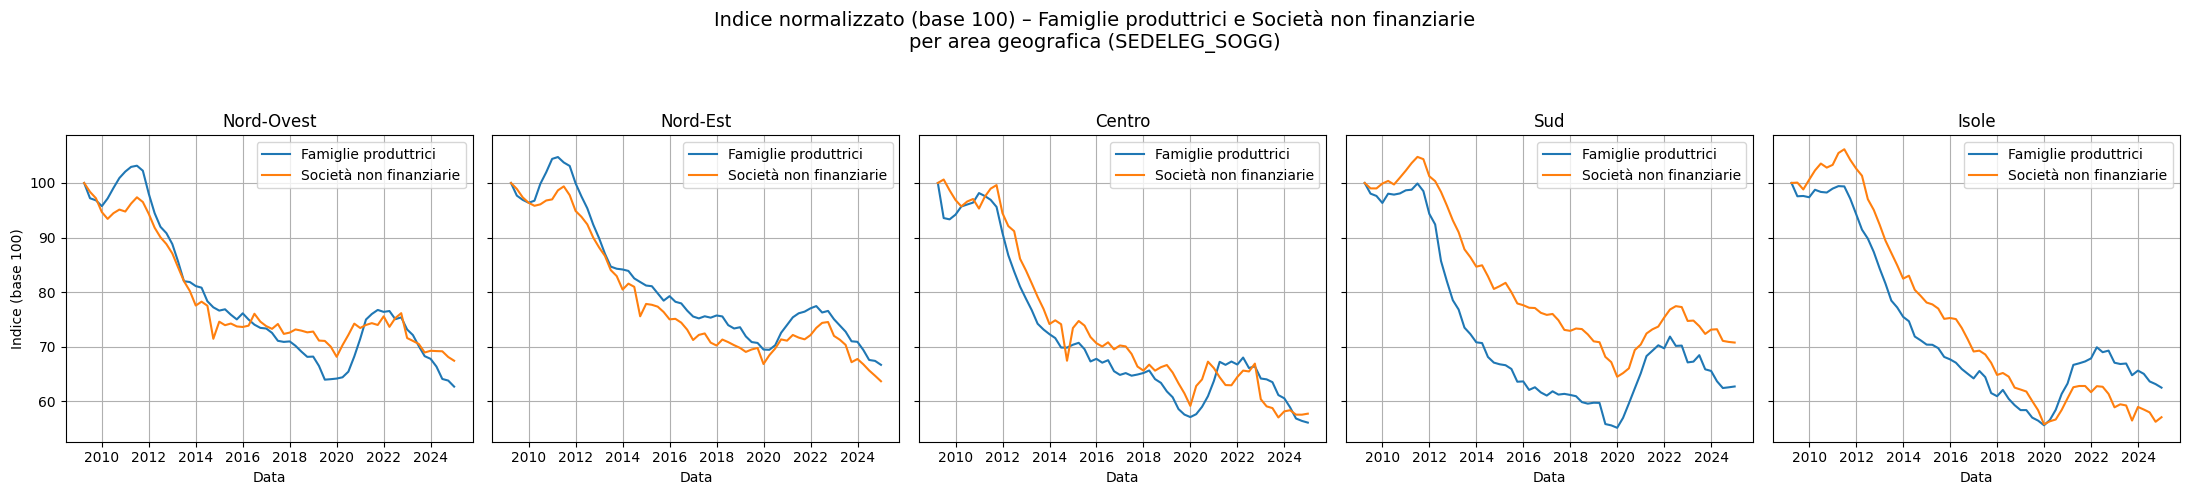

In [13]:
import matplotlib.pyplot as plt

# Etichette leggibili
etichette_sede = {
    "ITC": "Nord-Ovest",
    "ITH": "Nord-Est",
    "ITI": "Centro",
    "ITF": "Sud",
    "ITG": "Isole"
}
etichette_set = {
    "S14BI4": "Famiglie produttrici",
    "S11": "Società non finanziarie"
}

# Aggregazione per SEDELEG_SOGG e SET_CTP
df_agg5 = df.groupby(["DATA_OSS", "SEDELEG_SOGG", "SET_CTP"], as_index=False)["VALORE"].sum()

# Pivot per ottenere colonne multi-index (SEDELEG_SOGG, SET_CTP)
df_pivot5 = df_agg5.pivot(index="DATA_OSS", columns=["SEDELEG_SOGG", "SET_CTP"], values="VALORE")

# Normalizzazione base 100 rispetto alla prima data disponibile
df_norm5 = df_pivot5.divide(df_pivot5.iloc[0]) * 100

# Costruzione dei facet: 1 riga, 5 colonne
fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharey=True)
sedi = ["ITC", "ITH", "ITI", "ITF", "ITG"]

for i, sede in enumerate(sedi):
    ax = axes[i]
    for tipo in ["S14BI4", "S11"]:
        col = (sede, tipo)
        if col in df_norm5.columns:
            label = etichette_set.get(tipo, tipo)
            ax.plot(df_norm5.index, df_norm5[col], label=label)
    ax.set_title(etichette_sede[sede])
    ax.set_xlabel("Data")
    if i == 0:
        ax.set_ylabel("Indice (base 100)")
    ax.grid(True)
    ax.legend()

plt.suptitle("Indice normalizzato (base 100) – Famiglie produttrici e Società non finanziarie\nper area geografica (SEDELEG_SOGG)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


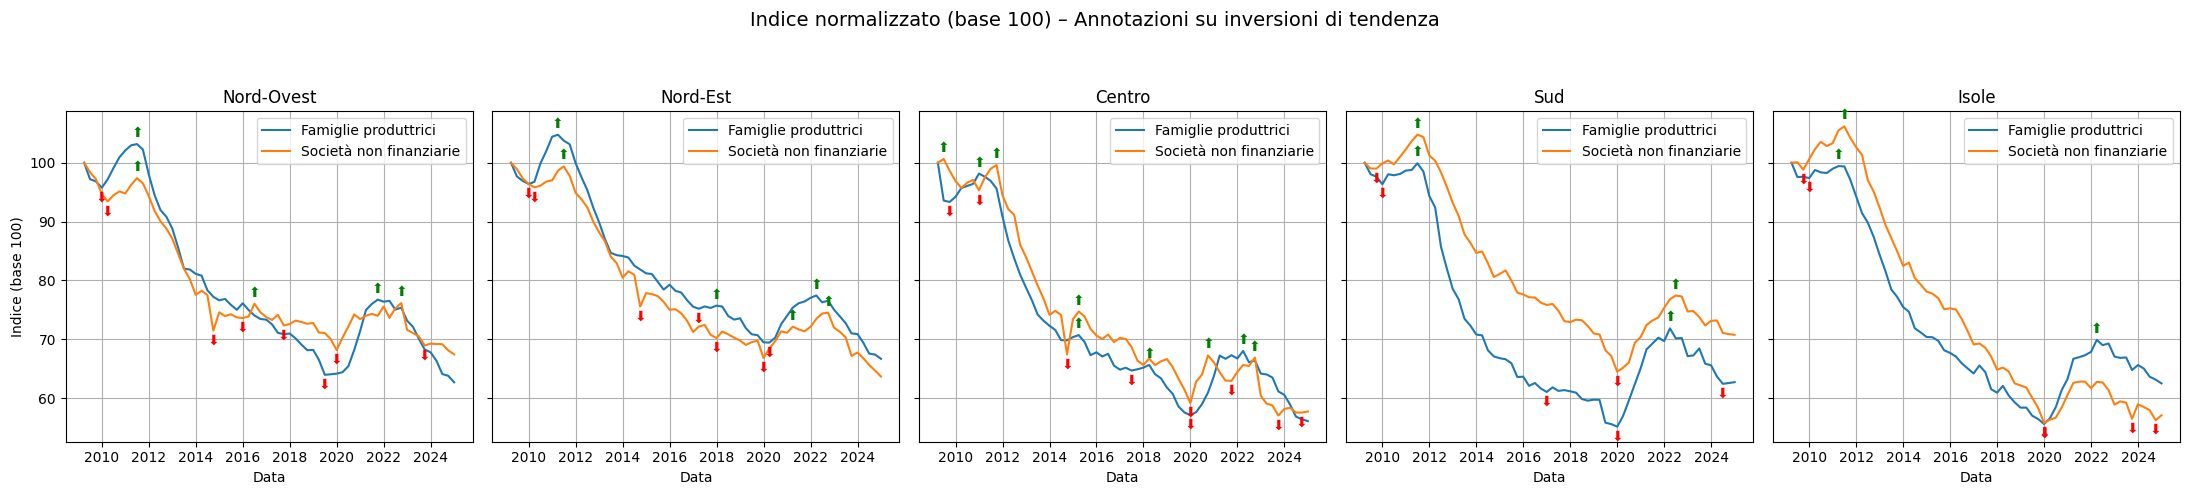

In [115]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np

# Assumiamo che df_norm5 sia già pronto come nel tuo codice precedente

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharey=True)
sedi = ["ITC", "ITH", "ITI", "ITF", "ITG"]

for i, sede in enumerate(sedi):
    ax = axes[i]
    for tipo in ["S14BI4", "S11"]:
        col = (sede, tipo)
        if col in df_norm5.columns:
            serie = df_norm5[col].dropna()
            x = serie.index
            y = serie.values
            ax.plot(x, y, label=etichette_set.get(tipo, tipo))

            # Trova massimi e minimi locali
            max_idx = argrelextrema(y, np.greater, order=3)[0]
            min_idx = argrelextrema(y, np.less, order=3)[0]

            # Annotazioni
            for idx in max_idx:
                ax.annotate('⬆', (x[idx], y[idx]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            for idx in min_idx:
                ax.annotate('⬇', (x[idx], y[idx]), textcoords="offset points", xytext=(0,-10), ha='center', color='red')

    ax.set_title(etichette_sede[sede])
    ax.set_xlabel("Data")
    if i == 0:
        ax.set_ylabel("Indice (base 100)")
    ax.grid(True)
    ax.legend()

plt.suptitle("Indice normalizzato (base 100) – Annotazioni su inversioni di tendenza", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()
